# Final Assessment: Group Project Work  

Fundamentals of Data Science

BSc Computing SEC B

GROUP 1

1.   Prajwal Nepal

2.   Sandesh Paudel

3.   Pranij Joshi

4.   Kasish Upreti

5.   Supriya Shahi

# Question 1:(20 points)

During our class, we have seen how a k-NN algorithm works. A simple version of the algorithm is
given below.
The KNN Algorithm
1. Load the data.
2. Initialize K to your chosen number of neighbors.
3. For each sample in the data (read from file):
3.1 Calculate the distance between the query (user input) sample and the current sample from
the data.
3.2 Add the distance and the index of the sample to an ordered collection (your chosen data
structure).
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the
distances.
5. Pick the first K entries from the sorted collection.
6. Get the labels of the selected K entries.
7. Depending on the labels you obtained, classify your new point.


a. Based on this algorithm, write a Python function myknn that takes as inputs: 1. the value of K
(no. of neighbors) and, 2. one data(example) to be classified, and performs k-NN based
classification of that input point based on some old data which is read from the given file
(Entrance_Selection.csv). The function should return the output class of the given input example.
Make sure your function gives an exception if there is any problem when reading the file. Hint: Use
exception handling.
Note: The default value of k should be 5.


In [ ]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import neighbors

def myknn(k, new_point):
    try:
        df = pd.read_csv('Entrance_Selection.csv')
    except:
        print("Could not find the file!!")
        
    x = np.array(df)
    X = x[:, 1:4]
    y = np.array(df['admit'])

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X, y)
    print(".........................................................")
    print("The accuracy when k=%d is %.2f%%"%(k, clf.score(X, y)*100))
    print(".........................................................")
    return (clf.predict(new_point))
    
   
        
k = int(input("Enter the value of k: "));
new_point = np.array([[0,0,0]])
new_point[0][0] = int(input("Enter the GRE score: "))
new_point[0][1] = float(input("Enter the G.P.A: "))
new_point[0][2] = int(input("Enter the Rank: "))



myknn(k, new_point)
    
    

b. Now, place this function you just wrote in (a) inside a class named myclassifier, with necessary
adjustments. This class should also contain a constructor which initializes the value of k = 5 by
default. Also, when creating an object from this class, the user should be greeted with the following
message automatically: “Welcome to the Classifier written by YOUR NAME and YOUR NAME.
This classifier class can perform knn classification, and plot the results for you. How awesome!”


In [ ]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import neighbors

class myclassifier:
    
    def __init__(self, new_point):
        print("\n......................................................................................\n")
        print("Welcome to the classifier written by Pranij, Sandesh, Prajwal, Supriya and Kashis.")
        print("This classifier class can perform knn classification, and plot the results for you.")
        print("How awesome!")
        print("\n......................................................................................\n")
        self.k = 5
        self.new_p = new_point
        self.clf = neighbors.KNeighborsClassifier(self.k)
        try:
            df = pd.read_csv('Entrance_Selection.csv')
        except:
            print("No file found")
            
        self.x = np.array(df)
        self.X = self.x[:, 1:4]
        self.y = np.array(df['admit'])
       

    def myknn(self):
        
        self.clf.fit(self.X, self.y)
        
        print("The accuracy when k=%d is %.2f%%"%(self.k, self.clf.score(self.X, self.y)*100))
        print("\n.........................................................\n")
        return (self.clf.predict(self.new_p))
        
   
        
new_point = np.array([[0,0,0]])
new_point[0][0] = int(input("Enter the GRE score: "))
new_point[0][1] = float(input("Enter the G.P.A: "))
new_point[0][2] = int(input("Enter the Rank: "))

c = myclassifier(new_point)
c.myknn() 

c. Finally, we also want to visualize the results. As such, write another method myplot inside the
above class which gives a scatter plot of any two features of the data read from the file
(Entrance_Selection.csv). Also plot the new data point to be classified- that was entered by the userin
the same scatter plot (using different color).

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import neighbors
from matplotlib.colors import ListedColormap


class myclassifier:
    
    def __init__(self, new_point):
        print("\n......................................................................................\n")
        print("Welcome to the classifier written by Pranij, Sandesh, Prajwal, Supriya and Kashis.")
        print("This classifier class can perform knn classification, and plot the results for you.")
        print("How awesome!")
        print("\n......................................................................................\n")
        self.k = 5
        self.new_p = new_point
        self.clf = neighbors.KNeighborsClassifier(self.k)
        
        df = pd.read_csv('Entrance_Selection.csv')

        self.x = np.array(df)
        self.X = self.x[:, 2:4]
        self.y = np.array(df['admit'])

    def myknn(self):
            

            
        self.clf.fit(self.X, self.y)
        
        print("The accuracy when k=%d is %.2f%%"%(self.k, self.clf.score(self.X, self.y)*100))
        print("\n.........................................................\n")
        return (self.clf.predict(self.new_p))
#             print("Could not find the file!!")
            
    def myplot(self):
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
        
        h = .02

        x_min, x_max = self.X[:, 0].min() - 0.25, self.X[:, 0].max() + 0.5
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        Z = self.clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("2-Class classification with first two dimension(Entrance selection) (k = %i)" % self.k)
        plt.show()

        
new_point = np.array([[0,0]])
new_point[0][0] = float(input("Enter the G.P.A: "))
new_point[0][1] = int(input("Enter the Rank: "))

c = myclassifier(new_point)
admit = c.myknn()
if admit == 1:
    print("Admitted")
else:
    print("Not admitted")
c.myplot()

# Question 2: (15 points)


In addition to how the k-NN algorithm works, we have also seen the Iris data set, and have
understood how data is stored in scikit learn. There are other similar data sets available in the scikit
learn library of which one very popular is the breast cancer wisconsin dataset. The dataset can be
loaded as follows:
from sklearn.datasets import load_breast_cancer


a. Use the k-NN algorithm provided in the sklearn package (use k = 5) to classify the breast cancer
data-set into their respective classes.


In [ ]:

import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
#print(cancer.keys())

k = 15
print(cancer.target_names)

X = cancer.data
y = cancer.target


clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, y)

print("The accuracy score with all the data is %.3f." %clf.score(X, y))

b. Vary the number of nearest neighbors (k) from 5 to 100 in intervals of 10 and compare the
training and the test scores. Take k = 5, k = 15, k = 25, k = 35 and so on. What is the optimum
value of k which gives the best results. Demonstrate with numbers by printing the training and test
scores.


In [ ]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import neighbors
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer

def myKNN(k):
    cancer = load_breast_cancer()
    #print(cancer.keys()
    X = cancer.data
    y = cancer.target

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X, y)
    print("When k = %d,the training score is: %.3f" %(k, clf.score(X, y)))

for i in range(5, 100, 10):
    myKNN(i)


c. Now repeat the step in (a) by using the Random Forest classifier. Compare the performance in
both the cases. Does the performance improve when using this new algorithm (Random Forest)
compared to k-NN. Demonstrate with examples by using accuracy score.
Hint: You can choose the best value of k that you obtained above when making this comparison.

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_breast_cancer

k = 5 

cancer = load_breast_cancer()
#print(cancer.keys()
X = cancer.data
y = cancer.target

nn_clf = neighbors.KNeighborsClassifier(k)
nn_clf.fit(X, y)

rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

print("Using KNN classification, when k = %d we get the best accuracy score which is: %.3f" %(k, nn_clf.score(X, y)))
print("Using random forest the accuracy score is %.3f" %rf_clf.score(X, y))


# Question 3: (15 points)


The file tourist_arrival.csv shows the number of tourists that visited Nepal each month from the
year 1992 to the year 2013.


a. Using the data in the file “tourist_arrival.csv”, fit a Linear Regression curve to the given data.


In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv('tourist_arrival.csv')

del df['Year']
del df['Total']

value = np.array(df.values)

value = value.ravel
x = np.arange(0, len(value()))
X = x[:, np.newaxis]
y = value()


model = LinearRegression()


print(model.fit(X, y))
m = model.coef_
c = model.intercept_

LinearRegression()


b. Using matplotlib, plot the linear regression line over the given data set to visualize how well your
model fits the original data.


Text(0, 0.5, 'Number of People')

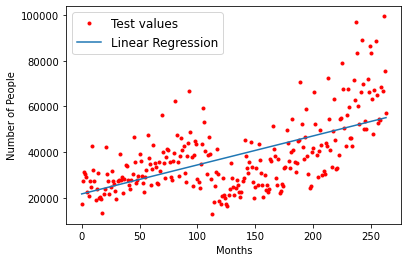

In [2]:
plt.plot(X, y, 'r.', label = 'Test values')

y_new = m*X+c
plt.plot(X, y_new, label = 'Linear Regression')
plt.legend(loc = 'best', fontsize = 'large')
plt.xlabel('Months')
plt.ylabel('Number of People')

c. Using your newly fitted model, can you predict the number of tourists that arrived in February
2019?

The predicted number of tourist on feb 2019 is 62840.381


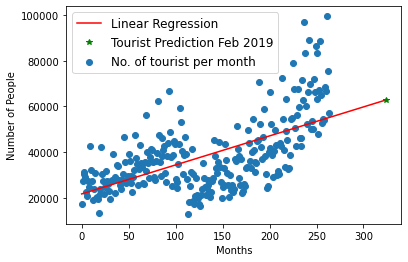

In [3]:
x_new = np.arange(0, 325)
y_new = m*x_new+c
feb2019 = m *324 +c
plt.scatter(X, y, label = 'No. of tourist per month')

plt.plot(x_new, y_new, 'r-', label = 'Linear Regression')
plt.plot(324, feb2019, 'g*', label = 'Tourist Prediction Feb 2019')
plt.legend(loc = 'best', fontsize = 'large')
plt.xlabel('Months')
plt.ylabel('Number of People')
print("The predicted number of tourist on feb 2019 is %.3f" %feb2019)